<a href="https://colab.research.google.com/github/worldterminator/worldterminator/blob/main/ps2(Yachun%26Citlalli).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
import pandas as pd
# Reading the CSV while skipping the first two rows
test1 = pd.read_csv('https://raw.githubusercontent.com/worldterminator/worldterminator/main/UnemploymentReport%20-%20UnemploymentReport%20(1).csv', skiprows=2)
unemployment = test1.drop(columns=['Unnamed: 0', 'Unnamed: 13'])


In [105]:
unemployment.head() #this resulting df is the unemployment df :)

,FIPS,Name,2014,2015,2016,2017,2018,2019,2020,2021,2022,Median Household Income (2021),% of State Median HH Income
0,34000,New Jersey,6.7,5.7,4.9,4.5,4.0,3.5,9.4,6.6,3.7,"$89,227",100.0%
1,34001,"Atlantic County, NJ",10.5,9.5,7.4,7.1,5.7,4.9,17.1,9.8,5.1,"$65,693",73.6%
2,34003,"Bergen County, NJ",5.4,4.6,4.1,3.8,3.3,2.8,9.2,6.3,3.4,"$104,777",117.4%
3,34005,"Burlington County, NJ",6.4,5.3,4.4,4.0,3.6,3.2,7.9,5.6,3.3,"$94,043",105.4%
4,34007,"Camden County, NJ",7.7,6.4,5.5,5.0,4.5,3.9,9.7,7.0,4.0,"$77,675",87.1%


In [138]:
ED=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/ED.xlsx')
ED.head()
# this is emergency department data from 2021 by county retreived from New Jersey State Health Assessment Data
# original table (after filters were applied) is available on https://www-doh.state.nj.us/doh-shad/query/result/ub/UB10AllEDCo/CrudeRate.html

,Year,County of Residence,County of Residence ID,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",95% CI LL,95% CI UL
0,2021,Atlantic,1,119344,274966,4340.3,4321.8,4358.8
1,2021,Bergen,2,187674,953819,1967.6,1959.6,1975.6
2,2021,Burlington,3,117235,464269,2525.2,2512.7,2537.6
3,2021,Camden,4,207627,523771,3964.1,3950.8,3977.3
4,2021,Cape May,5,31155,95661,3256.8,3227.1,3286.5


In [139]:
#replacement on condition to add ' County' after each county name. Did this again with the fourth dataset
ED['County of Residence']= ED['County of Residence'].apply(lambda x: x+ ' County' if 'County' not in x else x)
print(ED)

    Year       County of Residence  County of Residence ID  \
0   2021           Atlantic County                       1   
1   2021             Bergen County                       2   
2   2021         Burlington County                       3   
3   2021             Camden County                       4   
4   2021           Cape May County                       5   
5   2021         Cumberland County                       6   
6   2021              Essex County                       7   
7   2021         Gloucester County                       8   
8   2021             Hudson County                       9   
9   2021          Hunterdon County                      10   
10  2021             Mercer County                      11   
11  2021          Middlesex County                      12   
12  2021           Monmouth County                      13   
13  2021             Morris County                      14   
14  2021              Ocean County                      15   
15  2021

In [11]:
!ls

sample_data


In [147]:
# use 'unemployment' (all lowercase)#just realized this!!
Unemployment2021 = unemployment[['Name', '2021']]
Unemployment2021 = Unemployment2021.rename(columns={'Name': 'County of Residence'})
Unemployment2021.head()


,County of Residence,2021
0,New Jersey,6.6
1,"Atlantic County, NJ",9.8
2,"Bergen County, NJ",6.3
3,"Burlington County, NJ",5.6
4,"Camden County, NJ",7.0


In [148]:
Unemployment2021['County of Residence'] = Unemployment2021['County of Residence'].str.replace(', NJ', '')
#recode observations—drop ", NJ"
Unemployment2021 = Unemployment2021.rename(columns={'2021': 'Unemployment Rate'})
Unemployment2021.head()

,County of Residence,Unemployment Rate
0,New Jersey,6.6
1,Atlantic County,9.8
2,Bergen County,6.3
3,Burlington County,5.6
4,Camden County,7.0


In [115]:
print(dir())


['ED', 'In', 'Out', 'Unemployment2021', '_', '_10', '_101', '_105', '_106', '_108', '_110', '_114', '_12', '_19', '_2', '_27', '_3', '_38', '_4', '_40', '_41', '_44', '_45', '_47', '_48', '_54', '_55', '_56', '_57', '_60', '_61', '_62', '_63', '_64', '_65', '_66', '_69', '_70', '_71', '_72', '_73', '_74', '_76', '_77', '_79', '_80', '_81', '_82', '_83', '_84', '_85', '_86', '_9', '_91', '_92', '_94', '_96', '_98', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_exit_code', '_i', '_i1', '_i10', '_i100', '_i101', '_i102', '_i103', '_i104', '_i105', '_i106', '_i107', '_i108', '_i109', '_i11', '_i110', '_i111', '_i112', '_i113', '_i114', '_i115', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i21', '_i22', '_i23', '_i24', '_i25', '_i26', '_i27', '_i28', '_i29', '_i3', '_i30', '_i31', '_i32', '_i33', '_i34', '_i35', '_i36', '_i37', '_i38', '_i39', '_i4', '_i40', '_i41', '_i42', '_i43', '_i

In [149]:
Unemployment2021['County of Residence'] = Unemployment2021['County of Residence'].str.strip()
# Left merge 'Unemployment2021' into 'ED' based on 'County of Residence'
merged2021 = pd.merge(ED, Unemployment2021, on='County of Residence', how='left')
merged2021= merged2021[['Year', 'Unemployment Rate','County of Residence','Number of ED Visits','Number in the Population','Crude Rates per 10,000 - ED Visits']]
print(merged2021)
#hope this run on your end as well, Cit!
#now this looks clean and ready to go

    Year  Unemployment Rate       County of Residence  Number of ED Visits  \
0   2021                9.8           Atlantic County               119344   
1   2021                6.3             Bergen County               187674   
2   2021                5.6         Burlington County               117235   
3   2021                7.0             Camden County               207627   
4   2021                9.2           Cape May County                31155   
5   2021                8.0         Cumberland County                96481   
6   2021                8.3              Essex County               303723   
7   2021                6.3         Gloucester County                59812   
8   2021                7.0             Hudson County               199478   
9   2021                4.8          Hunterdon County                24527   
10  2021                5.5             Mercer County               134627   
11  2021                6.0          Middlesex County           

In [195]:
import numpy as np
# define the regions  NJ counties are divided into...
#while I was thinking about just northern vs southern, I tried 3 levels here
northern_counties = ['Bergen County', 'Essex County', 'Hudson County', 'Morris County', 'Passaic County', 'Sussex County', 'Union County', 'Warren County']  # Add other northern counties as needed
southern_counties = ['Atlantic County', 'Camden County', 'Cape May County', 'Cumberland County', 'Gloucester County', 'Salem County','Burlington County']  # Add other southern counties as needed
central_counties = ['Hunterdon County', 'Mercer County', 'Somerset County', 'Middlesex County','Monmouth County','Ocean County']  # Add other central counties as needed

# Create a new column 'Region' based on the county using list comprehension.
merged2021['Region'] = ['Northern' if county in northern_counties else
                        ('Southern' if county in southern_counties else
                         ('Central' if county in central_counties else np.nan))
                        for county in merged2021['County of Residence']]

# so I assigned NA value to the last row for unknown
print(merged2021)



    Year  Unemployment Rate       County of Residence  Number of ED Visits  \
0   2021                9.8           Atlantic County               119344   
1   2021                6.3             Bergen County               187674   
2   2021                5.6         Burlington County               117235   
3   2021                7.0             Camden County               207627   
4   2021                9.2           Cape May County                31155   
5   2021                8.0         Cumberland County                96481   
6   2021                8.3              Essex County               303723   
7   2021                6.3         Gloucester County                59812   
8   2021                7.0             Hudson County               199478   
9   2021                4.8          Hunterdon County                24527   
10  2021                5.5             Mercer County               134627   
11  2021                6.0          Middlesex County           

In [169]:
#aggregate ED visits by region
aggregated_data = merged2021.groupby('Region')['Number of ED Visits'].sum().reset_index()

# Print aggregated DataFrame
print(aggregated_data)

     Region  Number of ED Visits
0   Central               748772
1  Northern              1194628
2  Southern               649586


In [186]:
high_visits_condition = (merged2021['Number of ED Visits'] > 150000)
medium_visits_condition = ((merged2021['Number of ED Visits'] <= 150000) & (merged2021['Number of ED Visits'] > 100000))
low_visits_condition = (merged2021['Number of ED Visits'] <= 100000)

# Use .loc[] to assign the new values~
merged2021.loc[high_visits_condition, 'ED Visit Category'] = 'High'
merged2021.loc[medium_visits_condition, 'ED Visit Category'] = 'Medium'
merged2021.loc[low_visits_condition, 'ED Visit Category'] = 'Low'

# Print the result
print(merged2021)


    Year  Unemployment Rate       County of Residence  Number of ED Visits  \
0   2021                9.8           Atlantic County               119344   
1   2021                6.3             Bergen County               187674   
2   2021                5.6         Burlington County               117235   
3   2021                7.0             Camden County               207627   
4   2021                9.2           Cape May County                31155   
5   2021                8.0         Cumberland County                96481   
6   2021                8.3              Essex County               303723   
7   2021                6.3         Gloucester County                59812   
8   2021                7.0             Hudson County               199478   
9   2021                4.8          Hunterdon County                24527   
10  2021                5.5             Mercer County               134627   
11  2021                6.0          Middlesex County           

In [196]:
import pandas as pd
uninsured=pd.read_csv('https://github.com/worldterminator/worldterminator/raw/main/uninsurance.csv',header=1)
uninsured.head()

,Year,ID,Name,Number,MOE,%,%MOE,Number.1,MOE.1
0,2021,34000,New Jersey,556948,16751,10.0,0.3,5554302,0
1,2021,34001,"Atlantic County, NJ",19421,1936,12.0,1.2,161208,0
2,2021,34003,"Bergen County, NJ",50552,3921,8.8,0.7,577312,0
3,2021,34005,"Burlington County, NJ",17456,1758,6.3,0.6,277546,0
4,2021,34007,"Camden County, NJ",28487,2589,9.0,0.8,315907,0


In [197]:
#recode observations—drop ', NJ', again
uninsured['Name'] = uninsured['Name'].str.replace(', NJ', '')

In [198]:
uninsured = uninsured.drop(uninsured.index[0])
print(uninsured)

    Year     ID               Name  Number   MOE     %  %MOE  Number.1  MOE.1
1   2021  34001    Atlantic County   19421  1936  12.0   1.2    161208      0
2   2021  34003      Bergen County   50552  3921   8.8   0.7    577312      0
3   2021  34005  Burlington County   17456  1758   6.3   0.6    277546      0
4   2021  34007      Camden County   28487  2589   9.0   0.8    315907      0
5   2021  34009    Cape May County    4507   551   8.8   1.1     51105      0
6   2021  34011  Cumberland County   11816  1246  14.0   1.5     84590      0
7   2021  34013       Essex County   74856  5152  14.6   1.0    511982      0
8   2021  34015  Gloucester County   12229  1386   6.6   0.7    185768      0
9   2021  34017      Hudson County   63226  4576  13.6   1.0    463883      0
10  2021  34019   Hunterdon County    4018   489   5.2   0.6     76702      0
11  2021  34021      Mercer County   20589  2063   9.2   0.9    223877      0
12  2021  34023   Middlesex County   48603  3744   9.4   0.7    

In [191]:
uninsured.columns

Index(['Year', 'ID', 'Name', 'Number', 'MOE', '%', '%MOE', 'Number.1',
       'MOE.1'],
      dtype='object')

In [199]:
uninsured = uninsured.drop(uninsured.index[0])
# !Remove 'Year' and 'ID' columns
uninsured = uninsured.drop(columns=['Year', 'ID'])

# Rename 'Name' column to 'County of Residence'
uninsured = uninsured.rename(columns={'Name': 'County of Residence'})

# Merge uninsured with merged_2021 DataFrame based on 'County of Residence'
new_merged = pd.merge(merged2021, uninsured, how='inner', left_on='County of Residence', right_on='County of Residence')

# If you want the final DataFrame to have a clean set of column names, you can drop the redundant column(s)



In [47]:
new_merged.head()

,Year,County of Residence,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",Region,ED Visit Category,Number,MOE,%,%MOE,Number.1,MOE.1


In [200]:
homeless=pd.read_excel('https://github.com/worldterminator/worldterminator/raw/main/homeless.xlsx')
homeless.head()

,County,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden,650.0,0.08,199.0,0.13,77.0,0.09


In [201]:
homeless=homeless.dropna(how='all')
homeless.head()

,County,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
1,Atlantic,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May,113.0,0.01,12.0,0.01,10.0,0.01


In [202]:
homeless= homeless.rename(columns={'County ': 'County of Residence'})

In [203]:
homeless['County of Residence']= homeless['County of Residence'].apply(lambda x: x+ ' County' if 'County' not in x else x)
print(homeless)

   County of Residence  Total Homeless Persons   % of Total Homeless Persons   \
1      Atlantic County                    326.0                          0.04   
2        Bergen County                    279.0                          0.03   
3    Burlington County                    604.0                          0.07   
4        Camden County                    650.0                          0.08   
5      Cape May County                    113.0                          0.01   
6    Cumberland County                     82.0                          0.01   
7         Essex County                   1693.0                          0.21   
8    Gloucester County                     93.0                          0.01   
9        Hudson County                    882.0                          0.11   
10    Hunterdon County                    103.0                          0.01   
11       Mercer County                    393.0                          0.05   
12    Middlesex County      

In [182]:
homeless.columns

Index(['County of Residence', 'Total Homeless Persons ',
       '% of Total Homeless Persons ', 'Chronic Homeless Persons ',
       '% of Chronic Homeless Persons ', 'Unsheltered Homeless Persons ',
       '% of Unsheltered Homeless Persons '],
      dtype='object')

In [204]:
homeless.head()

,County of Residence,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
1,Atlantic County,326.0,0.04,112.0,0.08,122.0,0.15
2,Bergen County,279.0,0.03,4.0,0.00,5.0,0.01
3,Burlington County,604.0,0.07,117.0,0.08,8.0,0.01
4,Camden County,650.0,0.08,199.0,0.13,77.0,0.09
5,Cape May County,113.0,0.01,12.0,0.01,10.0,0.01


In [222]:
final_merged = pd.merge(new_merged, homeless, how='inner', left_on='County of Residence', right_on='County of Residence')

In [223]:
final_merged.head() ##yay!!lucy dancing

,Year,Unemployment Rate,County of Residence,Number of ED Visits,Number in the Population,"Crude Rates per 10,000 - ED Visits",Region,ED Visit Category,Number,MOE,%,%MOE,Number.1,MOE.1,Total Homeless Persons,% of Total Homeless Persons,Chronic Homeless Persons,% of Chronic Homeless Persons,Unsheltered Homeless Persons,% of Unsheltered Homeless Persons
0,2021,6.3,Bergen County,187674,953819,1967.6,Northern,High,50552,3921,8.8,0.7,577312,0,279.0,0.03,4.0,0.00,5.0,0.01
1,2021,5.6,Burlington County,117235,464269,2525.2,Southern,Medium,17456,1758,6.3,0.6,277546,0,604.0,0.07,117.0,0.08,8.0,0.01
2,2021,7.0,Camden County,207627,523771,3964.1,Southern,High,28487,2589,9.0,0.8,315907,0,650.0,0.08,199.0,0.13,77.0,0.09
3,2021,9.2,Cape May County,31155,95661,3256.8,Southern,Low,4507,551,8.8,1.1,51105,0,113.0,0.01,12.0,0.01,10.0,0.01
4,2021,8.0,Cumberland County,96481,153627,6280.2,Southern,Low,11816,1246,14.0,1.5,84590,0,82.0,0.01,18.0,0.01,19.0,0.02


In [208]:
final_merged.columns

Index(['Year', 'Unemployment Rate', 'County of Residence',
       'Number of ED Visits', 'Number in the Population',
       'Crude Rates per 10,000 - ED Visits', 'Region', 'ED Visit Category',
       'Number', 'MOE', '%', '%MOE', 'Number.1', 'MOE.1',
       'Total Homeless Persons ', '% of Total Homeless Persons ',
       'Chronic Homeless Persons ', '% of Chronic Homeless Persons ',
       'Unsheltered Homeless Persons ', '% of Unsheltered Homeless Persons '],
      dtype='object')

In [224]:
#there are a few columns (number, MOE, etc.) that need to be renamed or dropped:
final_merged.rename(columns={'Number': 'Total Number of Uninsured Persons'}, inplace=True)
final_merged.rename(columns={'%': '% of Uninsured Persons'}, inplace=True)
# Drop '%MOE' column
final_merged.drop(columns=['%MOE','MOE.1','Number.1'], inplace=True)

# Print modified DataFrame
final_merged.head

<bound method NDFrame.head of     Year  Unemployment Rate County of Residence  Number of ED Visits  \
0   2021                6.3       Bergen County               187674   
1   2021                5.6   Burlington County               117235   
2   2021                7.0       Camden County               207627   
3   2021                9.2     Cape May County                31155   
4   2021                8.0   Cumberland County                96481   
5   2021                8.3        Essex County               303723   
6   2021                6.3   Gloucester County                59812   
7   2021                7.0       Hudson County               199478   
8   2021                4.8    Hunterdon County                24527   
9   2021                5.5       Mercer County               134627   
10  2021                6.0    Middlesex County               191244   
11  2021                5.8     Monmouth County               166553   
12  2021                5.3       

In [230]:
final_merged.rename(columns={'Number in the Population': 'Total Population Estimates'}, inplace=True)

In [232]:
final_merged.columns

Index(['Year', 'Unemployment Rate', 'County of Residence',
       'Number of ED Visits', 'Total Population Estimates',
       'Crude Rates per 10,000 - ED Visits', 'Region', 'ED Visit Category',
       'Total Number of Uninsured Persons', 'MOE', '% of Uninsured Persons',
       'Total Homeless Persons ', '% of Total Homeless Persons ',
       'Chronic Homeless Persons ', '% of Chronic Homeless Persons ',
       'Unsheltered Homeless Persons ', '% of Unsheltered Homeless Persons '],
      dtype='object')

In [234]:
aggregated_data2 = final_merged.groupby('Region')['Total Homeless Persons '].sum().reset_index()
print(aggregated_data2)
#aggregate total homeless persons by region
aggregated_data3 = final_merged.groupby('Region')['Total Number of Uninsured Persons'].sum().reset_index()
print(aggregated_data3)
#aggregate total uninsured persons by region
aggregated_data4 = final_merged.groupby('ED Visit Category')['Total Population Estimates'].sum().reset_index()
print(aggregated_data4)
#aggregate total population by county's ED visits category

     Region  Total Homeless Persons 
0   Central                   2039.0
1  Northern                   4156.0
2  Southern                   1576.0
     Region  Total Number of Uninsured Persons
0   Central                             142156
1  Northern                             317834
2  Southern                              77537
  ED Visit Category Total Population Estimates
0              High                    6280360
1               Low                    1861637
2            Medium                     850167


(ps2 stuff ends here.)

In [ ]:
#str. replace ("$"," ") convert some characters (?)
#always use dtypes to see the types of variables
#could use pandas to load excels (AOK-proved)

#df.(variable name)=df['column name'].astype(float) #create a new variable for the values so it floats
#the purpose of the float function is to convert real numbers or integers into floating point numbers
#the query function
#.isnull #deal with missing data #().replace(np.nan, "None")
#inplace='True' inmportant when the replacement is meant to be saved
#(df).(v)=(df).(v).replace(['domestic','foreign'], ['0','1'])
#conditional replacement df.loc [df['var']==['value'].'var2']='100' give 100 to var2 into filtered rows
#newauto=auto['',''] subset or df.sample(frac=0.5, replace=False, random_state=1)
#every time we run code with random_state value 1, it will produce the same splitting datasets.
#df[['','']].[48:53]

Dataset1

In [ ]:
import gdown
import pandas as pd

file_id = '1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR'

# URL for download—so I think you could download it using this link
url = f'https://drive.google.com/uc?id={file_id}'

# Specify the destination file path
output_path = 'your_data.xlsx'

# Download the file
gdown.download(url, output_path, quiet=False)

# Read the XLSX file into a pandas DataFrame
enrollment = pd.read_excel(output_path)

enrollment.head()


Downloading...
From: https://drive.google.com/uc?id=1aCUZ-9Yzy9zDU-XkOIyY2s10mFuhxuoR
To: /content/your_data.xlsx
100%|██████████| 134k/134k [00:00<00:00, 82.2MB/s]


,County Code,County Name,District Code,District Name,Total Enrollment,White,%White,Black,%Black,Hispanic,...,Tenth Grade,Eleventh Grade,Twelfth Grade,Ungraded,%Free Lunch,%Reduced Lunch,%English Learners,%Migrant,%Military,%Homeless
0,01,Atlantic,10.0,Absecon Public Schools District,887.0,447.0,50.4,133.0,15.0,208.0,...,0.0,0.0,0.0,25.0,40.8,5.9,8.7,0.0,0.8,0.2
1,01,Atlantic,110.0,Atlantic City School District,6450.0,265.0,4.1,2147.0,33.3,2847.0,...,462.0,405.0,369.0,286.0,81.5,3.6,16.1,0.0,0.0,2.2
2,01,Atlantic,120.0,Atlantic County Vocational School District,1713.0,516.0,30.1,296.0,17.3,721.0,...,399.0,355.0,362.0,160.0,48.6,9.6,0.0,0.0,2.5,0.6
3,01,Atlantic,125.0,Atlantic County Special Services School District,306.0,95.0,31.0,82.0,26.8,108.0,...,3.0,5.0,13.0,244.0,39.5,5.9,0.3,0.0,0.3,1.0
4,01,Atlantic,570.0,Brigantine Public School District,444.0,314.0,70.7,18.0,4.1,62.0,...,0.0,0.0,0.0,12.0,33.8,8.3,3.4,0.0,2.3,0.5


In [ ]:
filtered_enrollment = enrollment[enrollment['Total Enrollment'] == 887]
print(filtered_enrollment)
#here I filtered the rows for a specifc value assigned to total enrollment

  County Code County Name  District Code                    District Name  \
0          01    Atlantic           10.0  Absecon Public Schools District   

   Total Enrollment  White  %White  Black  %Black  Hispanic  ...  Tenth Grade  \
0             887.0  447.0    50.4  133.0    15.0     208.0  ...          0.0   

   Eleventh Grade  Twelfth Grade  Ungraded  %Free Lunch  %Reduced Lunch  \
0             0.0            0.0      25.0         40.8             5.9   

   %English Learners  %Migrant  %Military  %Homeless  
0                8.7       0.0        0.8        0.2  

[1 rows x 42 columns]


In [ ]:
mean_value = enrollment['%Reduced Lunch'].mean()
median_value = enrollment['%Free Lunch'].median()
print(mean_value, median_value)
#in 2020-2021 enrollment in New Jersey, the mean of the student percentage enrolled in reduced lunch plan acrossed school districts was 4.17% and the median was 18.2

4.173134328358209 18.2


Dataset2



In [ ]:
import pandas as pd

# Define the URL of the file uploaded to GitHub
github_url = 'https://github.com/worldterminator/worldterminator/raw/main/poverty%20school%20districts.xlsx'

# Read the Excel file into a pandas DataFrame
poverty = pd.read_excel(github_url)
#try renaming the columns to make the variable names shorter
poverty.rename(columns={'Estimated Total Population': 'Total Population'}, inplace=True)
poverty.rename(columns={'Estimated Population 5-17': 'Number of Children 5~17'}, inplace=True)
poverty.rename(columns={'Estimated number of relevant children 5 to 17 years old in poverty who are related to the householder': 'Number of Children in Poverty'}, inplace=True)

poverty.head()


,State Postal Code,State FIPS Code,District ID,Name,Total Population,Number of Children 5~17,Number of Children in Poverty
0,NJ,34,660,Absecon City School District,9151,1299,230
1,NJ,34,690,Alexandria Township School District,4845,488,20
2,NJ,34,720,Allamuchy Township School District,5388,673,31
3,NJ,34,750,Allendale Borough School District,6834,893,29
4,NJ,34,780,Allenhurst Borough School District,473,55,9


In [ ]:
from pandas.plotting import deregister_matplotlib_converters
min_value = poverty['Number of Children in Poverty'].min()
max_value = poverty['Number of Children in Poverty'].max()
print(min_value, max_value)
#according to 2021 NJ statistics, the minimum of the number of children in poverty from relvant households in a school district was 1 and the maximum number was 15814.
#very big number, so pull it out for a look
filtered_poverty = poverty[poverty['Number of Children in Poverty'] == 15814]
print(filtered_poverty)

1 15814
    State Postal Code  State FIPS Code  District ID  \
337                NJ               34        11340   

                            Name  Total Population  Number of Children 5~17  \
337  Newark City School District            308371                    54847   

     Number of Children in Poverty  
337                          15814  


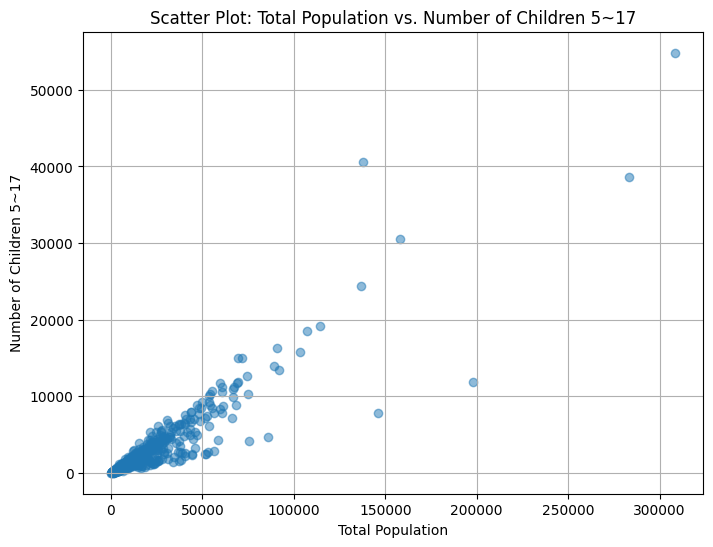

In [ ]:
import matplotlib.pyplot as plt

# extract columns 'Total Population' and 'Number of Children 5~17'
total_population = poverty['Total Population']
children_5_to_17 = poverty['Number of Children 5~17']

# tried to create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(total_population, children_5_to_17, alpha=0.5)
plt.title('Scatter Plot: Total Population vs. Number of Children 5~17')
plt.xlabel('Total Population')
plt.ylabel('Number of Children 5~17')
plt.grid(True)
plt.show()
#this describes, pretty intuitively, the tendency of the number of children in poverty going up with total population in a school district
#points converged around 0 with a few reaching for the upper right end (densely populated large districts)
#because of few non-compliance to this general trend, these districts within one state show some level of uniformity in demographic composition by poverty traits

Dataset 3

In [ ]:
import pandas as pd
!pip install openpyxl
import openpyxl
# URL
github_url = 'https://github.com/worldterminator/worldterminator/raw/main/startstrongpilot.xlsx'

# Read the Excel file into a pandas DataFrame, specifying the engine as 'openpyxl'
score = pd.read_excel(github_url, engine='openpyxl')
# Assuming 'score' is your DataFrame and you want to remove the 'District Name2' column
score = score.drop(columns=['District Name2']) #remove redundant info
score.head()


,AGG Description,AGG Group Description,Assessment Year,District Code,District Name,Test Code,Valid Scores,Percent Strong Support May Be Needed (Level 1),Precent Some Support May Be Needed (Level 2),Percent Less Support May Be Needed (Level 3)
0,District,Total,2020-2021,30745.0,CARLSTADT-EAST RUTHERFORD REGIONAL HIGH SCHOOL...,ALG01,76,45,37,18
1,District,Total,2020-2021,32080.0,HASBROUCK HEIGHTS SCHOOL DISTRICT,ALG01,175,47,22,31
2,District,Total,2020-2021,32620.0,LEONIA PUBLIC SCHOOL DISTRICT,ALG01,69,45,22,33
3,District,Total,2020-2021,32900.0,MAHWAH TOWNSHIP PUBLIC SCHOOL DISTRICT,ALG01,202,31,25,44
4,District,Total,2020-2021,33710.0,NORTHERN VALLEY REGIONAL HIGH SCHOOL DISTRICT,ALG01,344,20,26,53


In [ ]:
score['Percent Strong Support May Be Needed (Level 1)'] = pd.to_numeric(score['Percent Strong Support May Be Needed (Level 1)'], errors='coerce')
mean_value = score['Percent Strong Support May Be Needed (Level 1)'].mean()
print(mean_value)
#across the school districts statewide, the mean value of student percentage that needed level 1 strong support (level 1-3 as performance levels) was 35.9%.

#standard deviation
score['Valid Scores'] = pd.to_numeric(score['Valid Scores'], errors='coerce') #recognize non-numeric values as NaN
std_deviation = score['Valid Scores'].std()
print(f"Standard Deviation: {std_deviation}")

#across these districts, the standard deviation of the number of valid scores for examination was 172.1, pretty substantial.
#interpret test statistics while aware of the varying input of scores

35.90086956521739
Standard Deviation: 172.1093919035122


['CARLSTADT-EAST RUTHERFORD REGIONAL HIGH SCHOOL DISTRICT'
 'HASBROUCK HEIGHTS SCHOOL DISTRICT' 'LEONIA PUBLIC SCHOOL DISTRICT'
 'MAHWAH TOWNSHIP PUBLIC SCHOOL DISTRICT'
 'NORTHERN VALLEY REGIONAL HIGH SCHOOL DISTRICT'
 'RAMAPO INDIAN HILLS REGIONAL HIGH SCHOOL DISTRICT'
 'RIDGEFIELD SCHOOL DISTRICT' 'ROCHELLE PARK SCHOOL DISTRICT'
 'TEANECK SCHOOL DISTRICT' 'MOUNT LAUREL TOWNSHIP SCHOOL DISTRICT'
 'SOUTHAMPTON TOWNSHIP SCHOOL DISTRICT'
 'LOWER CAPE MAY REGIONAL SCHOOL DISTRICT'
 'ESSEX COUNTY SCHOOLS OF TECHNOLOGY' 'IRVINGTON PUBLIC SCHOOL DISTRICT'
 'GLOUCESTER COUNTY VOCATIONAL-TECHNICAL SCHOOL DISTRICT'
 'BAYONNE SCHOOL DISTRICT' 'EAST NEWARK SCHOOL DISTRICT'
 'HARRISON PUBLIC SCHOOLS' 'UNION CITY SCHOOL DISTRICT'
 'WEST NEW YORK SCHOOL DISTRICT'
 'MIDDLESEX COUNTY VOCATIONAL AND TECHNICAL SCHOOL DISTRICT'
 'SOUTH RIVER PUBLIC SCHOOL DISTRICT' 'MILLSTONE TOWNSHIP SCHOOL DISTRICT'
 'RED BANK REGIONAL SCHOOL DISTRICT'
 'RUMSON-FAIR HAVEN REGIONAL HIGH SCHOOL DISTRICT'
 'MOUNT ARLINGT

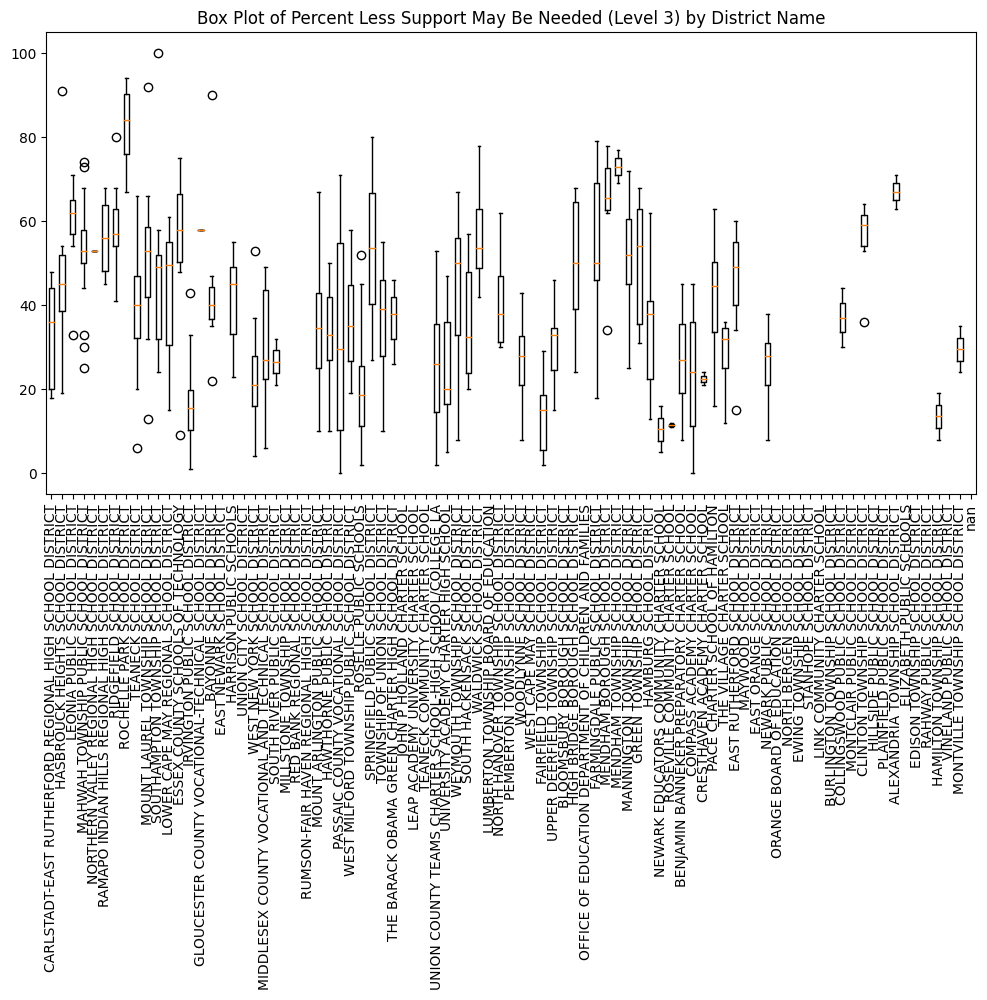

In [ ]:
#checked for labels and also converted non-numric values in the outcome variable
unique_labels = score['District Name'].unique()
print(unique_labels)
score['Percent Less Support May Be Needed (Level 3)'] = pd.to_numeric(score['Percent Less Support May Be Needed (Level 3)'], errors='coerce')

import matplotlib.pyplot as plt

# this is a box plot descriptive of the distribution of student percentage that needed level 3 less support across all NJ counties
# a bit crowded, still, hope that it makes sense )
plt.figure(figsize=(12, 6))
plt.boxplot([score[score['District Name'] == district]['Percent Less Support May Be Needed (Level 3)'] for district in score['District Name'].unique()], labels=score['District Name'].unique())
plt.xticks(rotation=90)
plt.title('Box Plot of Percent Less Support May Be Needed (Level 3) by District Name')
plt.show()


In [ ]:
#though I imported these excel files eventually, I wrestled with error messages about needing to define an engine and that the file is not a zip file, and that certain columns are wrong.
#I tried uploading to google drive (google sheets)and to github. the latter worked.

#the excel formats especially the older .xls kept causing problems so I copied the value into a new file.
#I'm also not sure if the fact that the original downloads I tried were protected files also got in the way at first

In [ ]:
#the following .txt table without headers is the same as dataset 2 but I tried to fetch it from the webpage
#just for practice!!
#used a little help from chatGPT and the notebook. not sure if this looks right—
import requests

# URL of the .txt file
txt_url = "https://www2.census.gov/programs-surveys/saipe/datasets/2021/2021-school-districts/sd21-nj.txt"

response = requests.get(txt_url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    txt_data = response.text

    # Define the column headers (variable names)
    column_headers = ['Header1', 'District ID', 'District Name', 'Total Population', 'Number of Children 5~17', 'Number of Children in Poverty', 'HTML', 'Date']  # Replace with your actual headers

    # Prepend the column headers to the text data
    txt_data_with_headers = '\t'.join(column_headers) + '\n' + txt_data

    # Split the text into lines
    lines = txt_data_with_headers.split('\n')

    # Print more lines (adjust the number as needed)
    for i, line in enumerate(lines[:20]):  # Print the first 20 lines
        print(f"Line {i + 1}: {line}")
else:
    print(f"Failed to fetch .txt file: {response.status_code}")



Line 1: Header1	District ID	District Name	Total Population	Number of Children 5~17	Number of Children in Poverty	HTML	Date
Line 2: 34 00660 Absecon City School District                                                 9151     1299      230 sd21-nj.txt 30NOV2022 
Line 3: 34 00690 Alexandria Township School District                                          4845      488       20 sd21-nj.txt 30NOV2022 
Line 4: 34 00720 Allamuchy Township School District                                           5388      673       31 sd21-nj.txt 30NOV2022 
Line 5: 34 00750 Allendale Borough School District                                            6834      893       29 sd21-nj.txt 30NOV2022 
Line 6: 34 00780 Allenhurst Borough School District                                            473       55        9 sd21-nj.txt 30NOV2022 
Line 7: 34 00810 Alloway Township School District                                             3294      553       44 sd21-nj.txt 30NOV2022 
Line 8: 34 00840 Alpha Borough School

KeyError: ignored

In [ ]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

**DAT MAN: pandas, like stata, your lib for all data mgmt, most stats and vis)**

pandas helps a lot with traditional/2d data, kind of like r or stata, and quite unlike the rest of Py

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html


<br>for stata users:

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

<br>tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

<br>for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


### [sep5] dive into python: load real data (csv file), and basics                                                

(do note can collapse sec, and run all cells at once)

any software incl excel and spss can save as csv,    just make sure it is clean: one short alphanumeric header per column                                                                                                                                                                  
let's do an example, your first ps will be sth like that but using your own data                                                             



In [ ]:
#download file from online and save in colab as ex1.csv; note it's from: https://conjointly.com/kb/correlation-statistic/
#urllib.request.urlretrieve("https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download", "ex1.csv")
!wget -q -O ex1.csv https://drive.google.com/uc?id=1YH8DfzsQ8suZkVQBk7T9FTKvvm9Vyej8&export=download

In [ ]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
ex1.csv  sample_data


In [ ]:
dat=pd.read_csv('ex1.csv') #read it in  ; or full path: '/content/ex1.csv'

In [ ]:
dat.columns #list var names

Index(['Person', 'Height', 'Self Esteem'], dtype='object')

In [ ]:
dat.head(2)
dat.tail(2)

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6


,Person,Height,Self Esteem
18,19,63,3.4
19,20,61,3.6


In [ ]:
dat #get spreadsheet view: can sort on cols, filter, and copy

,Person,Height,Self Esteem
0,1,68,4.1
1,2,71,4.6
2,3,62,3.8
3,4,75,4.4
4,5,58,3.2
5,6,60,3.1
6,7,67,3.8
7,8,68,4.1
8,9,71,4.3
9,10,69,3.7


In [ ]:
dat["Height"][0:3] #subset or slice

0    68
1    71
2    62
Name: Height, dtype: int64

In [ ]:
#keep it simple! especially when figuring things out! keep only vars needed, say 5 or 10
#dont have a dataset with 500vars--you won't use them! just clutter and mess!
#and then later whenever you need more vars, just rerun the code retaining more
dat[["Height","Self Esteem"]][0:3]

,Height,Self Esteem
0,68,4.1
1,71,4.6
2,62,3.8


In [ ]:
# if data big take random sample! way better to learn and figure things out with small sample!!
# say frac=.1 for 10perc, or n=10 for 10obs
dat.sample(frac=0.5, replace=False, random_state=1) #random_state to ensure reproducibility of results;

,Person,Height,Self Esteem
3,4,75,4.4
16,17,65,4.1
6,7,67,3.8
10,11,68,3.5
2,3,62,3.8
14,15,60,3.4
4,5,58,3.2
17,18,67,3.8
7,8,68,4.1
1,2,71,4.6


In [ ]:
#dat["Height"]

In [ ]:
dat["Height"].mean() # median, mode, stdev

65.4

In [ ]:
dat["Height"].value_counts(dropna=False) #.nlargest(3) a tab or freq table

68    3
67    3
63    3
71    2
62    2
60    2
75    1
58    1
69    1
65    1
61    1
Name: Height, dtype: int64

<Axes: >

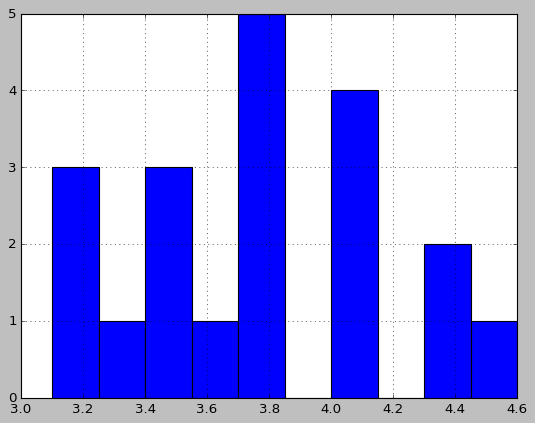

In [ ]:
dat["Self Esteem"].hist() #again, always interpret all output

In [ ]:
pd.crosstab(dat["Height"], dat["Self Esteem"]) #too many numbers for a crosstab!

Self Esteem,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,4.0,4.1,4.3,4.4,4.6
Height,,,,,,,,,,,,,
58,0,1,0,0,0,0,0,0,0,0,0,0,0
60,1,0,0,1,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,1,0,0,0,0,0,0,0
62,0,0,1,0,0,0,0,1,0,0,0,0,0
63,0,0,0,1,0,0,1,0,1,0,0,0,0
65,0,0,0,0,0,0,0,0,0,1,0,0,0
67,0,1,0,0,0,0,0,2,0,0,0,0,0
68,0,0,0,0,1,0,0,0,0,2,0,0,0
69,0,0,0,0,0,0,1,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Height', ylabel='Self Esteem'>

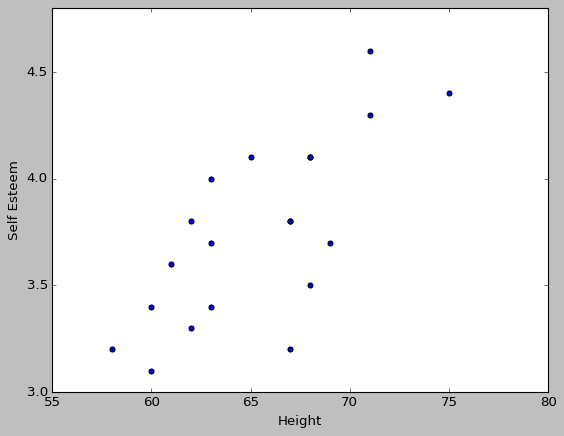

In [ ]:
dat.plot(kind='scatter', y='Self Esteem', x='Height')

In [ ]:
dat[['Height','Self Esteem']].corr().round(2)

,Height,Self Esteem
Height,1.00,0.73
Self Esteem,0.73,1.00


### [sep12] I/O import/export
can import-export ~20 formats eg csv, json, xml, xls, stata, sas:
https://pandas.pydata.org/docs/user_guide/io.html

if you work a lot with xls check out:

https://realpython.com/openpyxl-excel-spreadsheets-python/

https://automatetheboringstuff.com/chapter12/


## One quite subsection (just use "##")

the sharable link should look like: https://drive.google.com/file/d/your-file-id/view?usp=sharing
the link for downloading it would be
https://drive.google.com/uc?export=download&id=your-file-id



In [ ]:
#lets start with html, and especially handy wikipedia
#for match use header of col; ideally unique; case may matter
pd.read_html('https://en.wikipedia.org/wiki/List_of_counties_in_New_Jersey',match='Density',flavor=None)[0].head(3)

,County,FIPS code[12],County seat[13],Largest City[14],Est.[13],Formed from[6][7],Named for[15],Density (per mi2),Pop.[16],Area[13],Map
0,Atlantic County,1,Mays Landing,"Egg Harbor Township 47,842",1837,Gloucester County,"The Atlantic Ocean, which forms the county's e...",491.33,275638,"561 sq mi (1,453 km2)",NaN
1,Bergen County,3,Hackensack,"Hackensack 46,030",1683,One of four original counties created in East ...,"Bergen, New Netherland settlement",4072.64,952997,234 sq mi (606 km2),NaN
2,Burlington County,5,Mount Holly,"Evesham Township 46,826",1694,One of two original counties created in West J...,The old ancient name for an inland market near...,579.01,466103,"805 sq mi (2,085 km2)",NaN


In [ ]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_towns_in_India_by_population',match="Name of Town")[0].head(5)
#pd.read_html("https://en.wikipedia.org/wiki/Premier_League", match = "Position")[0].head(3)
#https://towardsdatascience.com/how-to-use-wikipedia-as-a-data-source-3dfea29e6539
#https://towardsdatascience.com/2-easy-ways-to-get-tables-from-a-website-with-pandas-b92fc835e741 some more ideas

,Name of Town,State,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help} Type,Population (2011),Ref
0,Achhnera,Uttar Pradesh,N.P.,22781,NaN
1,Adalaj,Gujarat,C.T.,11957,NaN
2,Adoor,Kerala,M,29171,NaN
3,Adyar,Karnataka,C.T.,7034,NaN
4,Adra,West Bengal,C.T.,14956,NaN


In [ ]:
!wget -q -O auto.dta https://docs.google.com/uc?id=1YpkQ-RgAQfB_4olxtbfRWnVmKwkXml5N&export=download
auto=pd.read_stata('auto.dta') #load stata data
auto.head(2)
#auto.to_stata('stata.dta') #save as stata data

#useful to set index to sth meaningful as opposed to 0,1,2
#auto = auto.set_index('make')

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


In [ ]:
auto.to_excel('auto.xlsx', sheet_name = 'testing', index = False) #save as xls
excelTest1 = pd.read_excel('auto.xlsx', 0)
excelTest1.head(2)
excelTest1.tail(2)

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
72,VW Scirocco,6850,25,4.0,2.0,16,1990,156,36,97,3.78,Foreign
73,Volvo 260,11995,17,5.0,2.5,14,3170,193,37,163,2.98,Foreign


In [ ]:
files.download('auto.xlsx') #download from colab/goog cloud onto your local hd

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

note: python can download files from online as above, but it can also upload, say to github:
https://stackoverflow.com/questions/63427607/python-upload-files-directly-to-github-using-pygithub

### [sep12] basic descriptive stats
(more later under visualization)

descriptive statistics (and visualization) are key to understanding data; and understanding data is key to successful data management!!!

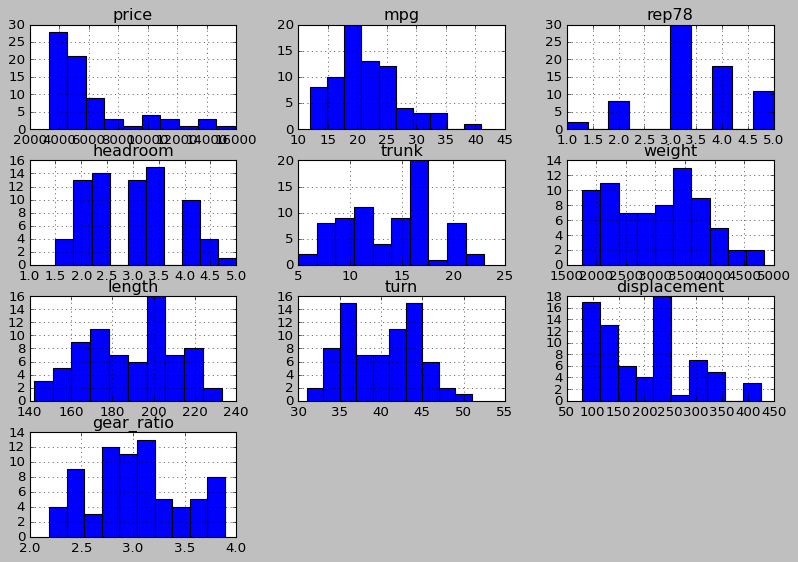

In [ ]:
#dir(auto) # all the stuff you can do on auto :)
#dir(auto.price) #and stuff you can do on price var
auto.hist(figsize=(12,8)); # eg hist

In [ ]:
#auto['make'][0] #py counts from zero!
auto['make'][0:3]
#auto[['weight', 'length']][0:3]   #note that need to double [[ ]]
# can also use loc or iloc to subset/slice on both rows and cols

0    AMC Concord
1      AMC Pacer
2     AMC Spirit
Name: make, dtype: object

In [ ]:
max(auto['mpg'])
print() #just add space
min(auto['mpg'])
#auto['mpg'].max()
#auto['mpg'].min()
#auto['mpg'].median()
#auto['mpg'].mean()
#auto['mpg'].std()

41

12

In [ ]:
#subsetting on condition
auto.make[auto.mpg<15]
#auto['make'][auto['mpg']<15]
#auto.make[auto.mpg.isin([11,12,13,14])]

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
Name: make, dtype: object

In [ ]:
auto.make[(auto.mpg<15) | (auto.mpg>40)] #https://stackoverflow.com/questions/22591174/pandas-multiple-conditions-while-indexing-data-frame-unexpected-behavior

10         Cad. Deville
11        Cad. Eldorado
25    Linc. Continental
26         Linc. Mark V
27     Linc. Versailles
29         Merc. Cougar
32           Merc. XR-7
63          Peugeot 604
70            VW Diesel
Name: make, dtype: object

In [ ]:
#subsetting using query
#auto.query("mpg<15  & foreign=='Foreign'")
#auto.query("weight <2000 | length <150")
auto.query("weight + length <2000")

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
23,Ford Fiesta,4389,28,4.0,1.5,9,1800,147,33,98,3.15,Domestic
42,Plym. Champ,4425,34,5.0,2.5,11,1800,157,37,86,2.97,Domestic
61,Honda Civic,4499,28,4.0,2.5,5,1760,149,34,91,3.30,Foreign
64,Renault Le Car,3895,26,3.0,3.0,10,1830,142,34,79,3.72,Foreign


In [ ]:
#len(auto)
auto.shape #74 obs, 12 vars

(74, 12)

In [ ]:
auto.dtypes #note: not 'str' but 'object' and 'category';
# Use a category when there is lots of repetition that you expect to exploit.
# A string variable consisting of only a few different values
# As a signal to other Python libraries that this column should be treated as a
#categorical variable (e.g. to use suitable statistical methods or plot types).

make              object
price              int16
mpg                int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
auto.select_dtypes(include = ['float32']).head(2)

,headroom,gear_ratio
0,2.5,3.58
1,3.0,2.53


In [ ]:
#auto.filter(like='wei').head(2) #stata: lookfor wei
auto.filter(regex='.*t$').head(2)

,weight,displacement
0,2930,121
1,3350,258


In [ ]:
auto.make[0:5] #note dtype

0      AMC Concord
1        AMC Pacer
2       AMC Spirit
3    Buick Century
4    Buick Electra
Name: make, dtype: object

In [ ]:
auto.foreign[0:5] #note dtype and categories

0    Domestic
1    Domestic
2    Domestic
3    Domestic
4    Domestic
Name: foreign, dtype: category
Categories (2, object): ['Domestic' < 'Foreign']

In [ ]:
#auto.describe()
auto.describe().T.round(2) #T just transposes

,count,mean,std,min,25%,50%,75%,max
price,74.0,6165.26,2949.50,3291.00,4220.25,5006.50,6332.25,15906.00
mpg,74.0,21.30,5.79,12.00,18.00,20.00,24.75,41.00
rep78,69.0,3.41,0.99,1.00,3.00,3.00,4.00,5.00
headroom,74.0,2.99,0.85,1.50,2.50,3.00,3.50,5.00
trunk,74.0,13.76,4.28,5.00,10.25,14.00,16.75,23.00
weight,74.0,3019.46,777.19,1760.00,2250.00,3190.00,3600.00,4840.00
length,74.0,187.93,22.27,142.00,170.00,192.50,203.75,233.00
turn,74.0,39.65,4.40,31.00,36.00,40.00,43.00,51.00
displacement,74.0,197.30,91.84,79.00,119.00,196.00,245.25,425.00
gear_ratio,74.0,3.01,0.46,2.19,2.73,2.96,3.35,3.89


In [ ]:
auto[['price','mpg','foreign']].groupby('foreign').describe().round(2)
#auto[['price','mpg','foreign']].groupby('foreign').median()

price                                                             \
         count     mean      std     min     25%     50%     75%      max   
foreign                                                                     
Domestic  52.0  6072.42  3097.10  3291.0  4185.5  4782.5  6199.5  15906.0   
Foreign   22.0  6384.68  2621.92  3748.0  4521.5  5759.0  7067.5  12990.0   

           mpg                                              
         count   mean   std   min    25%   50%   75%   max  
foreign                                                     
Domestic  52.0  19.83  4.74  12.0  16.75  19.0  22.0  34.0  
Foreign   22.0  24.77  6.61  14.0  21.00  24.5  27.5  41.0

In [ ]:
#auto[['make', 'price', 'mpg', 'rep78', 'foreign']].head(3) #first 3 obs
auto.sort_values(by='mpg')[['mpg','make','price']][0:3] #3 cars with lowest mpg

,mpg,make,price
26,12,Linc. Mark V,13594
25,12,Linc. Continental,11497
29,14,Merc. Cougar,5379


<Axes: >

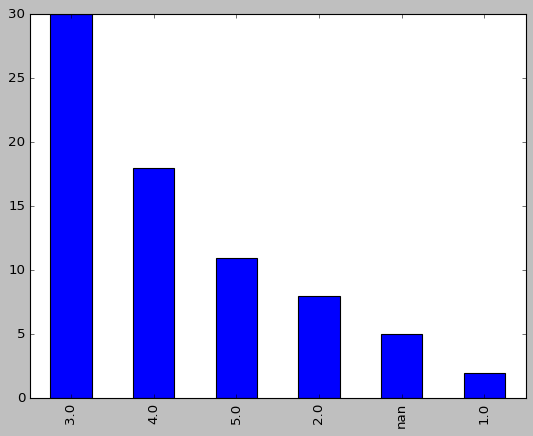

In [ ]:
#auto['rep78'].value_counts() #.nlargest(3)
auto['rep78'].value_counts(dropna=False).plot(kind='bar') #.nlargest(3)

In [ ]:
# stata: ta rep78 foreign
pd.crosstab(auto.rep78, auto.foreign) # crosstab
#pd.crosstab(auto.rep78, auto.foreign,normalize='columns') # col prop (normalize columns)
#pd.crosstab(auto.rep78, auto.foreign,normalize='index') #row prop (normalize rows)
#pd.crosstab(auto.rep78, auto.foreign,normalize='all') #cell prop

foreign,Domestic,Foreign
rep78,,
1.0,2,0
2.0,8,0
3.0,27,3
4.0,9,9
5.0,2,9


In [ ]:
auto.groupby(by=auto.foreign)['mpg'].mean().round(2) #mpg mean by foreign

foreign
Domestic    19.83
Foreign     24.77
Name: mpg, dtype: float64

In [ ]:
pd.pivot_table(auto, index='foreign', values='mpg', aggfunc='mean').round(2)

,mpg
foreign,
Domestic,19.83
Foreign,24.77


In [ ]:
pd.pivot_table(auto, index=['rep78','foreign'], values= 'mpg' , aggfunc=['median','std','min','max']).round(1)

median  std min max
                  mpg  mpg mpg mpg
rep78 foreign                     
1.0   Domestic     21  4.2  18  24
2.0   Domestic     18  3.8  14  24
3.0   Domestic     19  4.1  12  29
      Foreign      23  2.5  21  26
4.0   Domestic     18  4.6  14  28
      Foreign      25  2.7  21  30
5.0   Domestic     32  2.8  30  34
      Foreign      25  9.4  17  41

In [ ]:
#auto.mpg.corr(auto.weight)
auto[['mpg','weight']].corr().round(2) #corr matrix

,mpg,weight
mpg,1.00,-0.81
weight,-0.81,1.00


### <font color='red'>>>>will be updated from here on>>></font>

$>>>$ TODO pick up editing here

### manipulating data
btw, often running cell by cell is pain--can just collapse the whole section and then run the whole section at once :)

also may see per dropping, renaming, duplicate rows, outliers:
https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb

In [ ]:
auto.info() #useful function to see which var has missing

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   make          74 non-null     object  
 1   price         74 non-null     int16   
 2   mpg           74 non-null     int16   
 3   rep78         69 non-null     float64 
 4   headroom      74 non-null     float32 
 5   trunk         74 non-null     int16   
 6   weight        74 non-null     int16   
 7   length        74 non-null     int16   
 8   turn          74 non-null     int16   
 9   displacement  74 non-null     int16   
 10  gear_ratio    74 non-null     float32 
 11  foreign       74 non-null     category
dtypes: category(1), float32(2), float64(1), int16(7), object(1)
memory usage: 5.6+ KB


In [ ]:
auto['rep78'][0:3]
#print()
#auto['rep78'][0:3].notnull()
#auto['rep78'][0:3].isnull()

0    3.0
1    3.0
2    NaN
Name: rep78, dtype: float64

In [ ]:
# missing data
#http://pandas.pydata.org/pandas-docs/stable/missing_data.html
#https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
#https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html

auto['rep78'].value_counts(dropna=False) #doesn't show missing unless explicitly told
#print(auto['rep78'].to_string()) #print all rows
print()
print("count of missing:")
auto['rep78'].isnull().sum() #count missings on rep78 #NaN stands for missing
print()
#auto.loc[auto['rep78'].isnull()]
#auto[auto.rep78.isnull()][['rep78']]
auto[auto.rep78.isnull()][['make', 'price', 'mpg', 'rep78', 'foreign']] #stata: l make price mpg rep78 foreign if rep78==.

3.0    30
4.0    18
5.0    11
2.0     8
1.0     2
Name: rep78, dtype: int64


count of missing:


5

,make,price,mpg,rep78,foreign
2,AMC Spirit,3799,22,NaN,Domestic
6,Buick Opel,4453,26,NaN,Domestic
44,Plym. Sapporo,6486,26,NaN,Domestic
50,Pont. Phoenix,4424,19,NaN,Domestic
63,Peugeot 604,12990,14,NaN,Foreign


In [ ]:
auto2=auto.replace(np.nan, "None") #replace missing (np.nan) with "None"
auto2[auto2["rep78"]=="None"] #list the missing ones
#but in Py best keep missing as np.nan, so in general do sth like:
#auto.replace(-99, np.nan,inplace=True) #replace all -99 with missing
#auto.fillna('-', inplace=True) #replace missing with '-'

#can also get rid of missing just keep finite stuff:
#auto3 = auto[np.isfinite(auto['rep78'])]
#auto3.reset_index(inplace=True) #sometimes things go wrong bc index is not reset!
#len(auto)
#print()
#len(auto3)
##or more concisely for all of dataframe:
#len(auto)
#len(auto.dropna())
#auto.dropna(axis=1).dtypes #drop cols with missing data

,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
2,AMC Spirit,3799,22,None,3.0,12,2640,168,35,121,3.08,Domestic
6,Buick Opel,4453,26,None,3.0,10,2230,170,34,304,2.87,Domestic
44,Plym. Sapporo,6486,26,None,1.5,8,2520,182,38,119,3.54,Domestic
50,Pont. Phoenix,4424,19,None,3.5,13,3420,203,43,231,3.08,Domestic
63,Peugeot 604,12990,14,None,3.5,14,3420,192,38,163,3.58,Foreign


In [ ]:
# tostring, destring
auto['mpgST'] = auto.mpg.astype(object) #tostring
auto['mpgNU'] = auto.mpgST.astype(float) #destring
auto[['mpg','mpgST','mpgNU']][0:2]
auto[['mpg','mpgST','mpgNU']].dtypes #.fillna()

,mpg,mpgST,mpgNU
0,22,22,22.0
1,17,17,17.0


mpg        int16
mpgST     object
mpgNU    float64
dtype: object

In [ ]:
#stata: ren mpg newMpg
auto = auto.rename(columns={'mpg': 'newMpg',
                           'make': 'newMake'}) #ren var
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#stata: drop newMpg; but in general better just subset at the beginning
#del auto['newMpg']
auto.drop('newMpg',axis=1) #can specify list of vars in [[]]

,newMake,price,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,4.0,4.0,20,4080,222,43,350,2.41,Domestic
...,...,...,...,...,...,...,...,...,...,...,...
69,VW Dasher,7140,4.0,2.5,12,2160,172,36,97,3.74,Foreign
70,VW Diesel,5397,5.0,3.0,15,2040,155,35,90,3.78,Foreign
71,VW Rabbit,4697,4.0,3.0,15,1930,155,35,89,3.78,Foreign
72,VW Scirocco,6850,4.0,2.0,16,1990,156,36,97,3.78,Foreign


In [ ]:
auto.dtypes

newMake           object
price              int16
newMpg             int16
rep78            float64
headroom         float32
trunk              int16
weight             int16
length             int16
turn               int16
displacement       int16
gear_ratio       float32
foreign         category
dtype: object

In [ ]:
#new vars
auto['colOfOnes'] = 1
auto['colOfOnes'][0:3]

0    1
1    1
2    1
Name: colOfOnes, dtype: int64

In [ ]:
auto.at[1,'colOfOnes'] = 10 #https://stackoverflow.com/questions/13842088/set-value-for-particular-cell-in-pandas-dataframe
auto['colOfOnes'][0:5]

0     1
1    10
2     1
3     1
4     1
Name: colOfOnes, dtype: int64

In [ ]:
auto['colOfOnes'].replace(1,2,inplace=True)
# can also replace more than one at once, eg
# data['sex'].replace([0,1],['Female','Male'],inplace=True)
# see https://stackoverflow.com/questions/31888871/pandas-replacing-column-values

###recode
#mapping = {1:'<10k'
#          ,2:'<10k'
#          ,3:'<10k'
#          ,4:'10-20k'
#          ,5:'20-50k'
#          ,6:'50-100k'
#          ,7:'.1-.5m'
#          ,8:'>.5m'
#                    }
#df=df.assign(rurUrb  = df.X049.map(mapping))


auto['colOfOnes'][0:5]

0     2
1    10
2     2
3     2
4     2
Name: colOfOnes, dtype: int64

In [ ]:
# replace on condition
#auto.loc[auto['colOfOnes'] <5, 'colOfOnes']  = '22'
auto.loc[auto['foreign'] =='Domestic', 'colOfOnes']  = '100'
auto[['foreign','colOfOnes']][48:53]

,foreign,colOfOnes
48,Domestic,100
49,Domestic,100
50,Domestic,100
51,Domestic,100
52,Foreign,2


In [ ]:
#stata: by sort: egen mean count #stata: collapse
# https://stackoverflow.com/questions/50068443/collapse-rows-in-pandas-dataframe-with-different-logic-per-column
auto[['foreign','weight', 'length']].groupby('foreign').agg(['mean', 'count'])

weight            length      
                 mean count        mean count
foreign                                      
Domestic  3317.115385    52  196.134615    52
Foreign   2315.909091    22  168.545455    22

In [ ]:
#lets unpack a bit as this groupby agg may be non-intuitive
#https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html
df = pd.DataFrame({'A': [1, 1, 2, 2],
                    'B': [1, 2, 3, 4],
                    'C': np.random.randn(4)})
df
#and for a real world example using groupby agg see
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/

,A,B,C
0,1,1,1.058948
1,1,2,-1.301589
2,2,3,-0.752999
3,2,4,0.993326


In [ ]:
df.groupby('A').agg('min')

,B,C
A,,
1,1,-1.301589
2,3,-0.752999


In [ ]:
df.groupby('A').agg(['min', 'max'])

B             C          
  min max       min       max
A                            
1   1   2 -1.301589  1.058948
2   3   4 -0.752999  0.993326

In [ ]:
df.groupby('A').agg({'B': ['min', 'max'], 'C': 'sum'})

B             C
  min max       sum
A                  
1   1   2 -0.242641
2   3   4  0.240328

In [ ]:
#very useful can get the groups
g=auto[['mpg','foreign']].groupby('foreign')
g.get_group('Domestic').head(1)
g.get_group('Foreign').head(1)

,mpg,foreign
0,22,Domestic


,mpg,foreign
52,17,Foreign


### labelling

i'd just have nice descriptive var names, ditch var labels; and for val labels just have another string var that has labels instead of values; BUT see a workaround with dict below for printing var labels from stata


other ideas
https://stackoverflow.com/questions/60498830/view-stata-variable-labels-in-pandas ;
https://stackoverflow.com/questions/22500108/value-label-in-pandas ;
https://stackoverflow.com/questions/60805100/any-way-to-label-variables-in-python


LATER/TODO--see pandas docs

Value Labels: Python doesn't have value labels, but it has something even more useful, dicts.  
(I suspect that, under the covers, Stata is using hashes, which is what dicts really are, for value labels). The idea is to use a dict to map some or all of the values for a variable.



In [ ]:
# var labels #on stata iterator in py: https://kylebarron.dev/blog/reading-stata-files-with-python
pd.read_stata('auto.dta', iterator=True).variable_labels() #return stata reader obj
#itr.variable_labels()

# can also return data label and val labels
# pandas.io.stata.StataReader.data_label
# pandas.io.stata.StataReader.value_labels

{'make': 'Make and Model',
 'price': 'Price',
 'mpg': 'Mileage (mpg)',
 'rep78': 'Repair Record 1978',
 'headroom': 'Headroom (in.)',
 'trunk': 'Trunk space (cu. ft.)',
 'weight': 'Weight (lbs.)',
 'length': 'Length (in.)',
 'turn': 'Turn Circle (ft.) ',
 'displacement': 'Displacement (cu. in.)',
 'gear_ratio': 'Gear Ratio',
 'foreign': 'Car type'}

### merge

remember, difficult and tedious but extremely useful

merge on geo (county, muni, school id, etc), time (year, day, hour, etc), or on both (panel)

and anything else that you can find in 2 different datasets, eg occ code

REFS:

https://stackoverflow.com/questions/53645882/pandas-merging-101

http://pandas.pydata.org/pandas-docs/stable/merging.html

https://realpython.com/pandas-merge-join-and-concat/

https://sparkbyexamples.com/pandas/pandas-merge-dataframes-explained-examples/




In [ ]:
#make some dataset
d1 = pd.DataFrame({'id': ['1',  '2',  '3',  '4'],
                   'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3']
                   })

d2 = pd.DataFrame({'id': ['1', '2', '5', '6'],
                   'A': ['A4', 'A5', 'A6', 'A7'],
                   'C': ['C4', 'C5', 'C6', 'C7']
                   })
d1
d2

,id,A,B
0,1,A0,B0
1,2,A1,B1
2,3,A2,B2
3,4,A3,B3


,id,A,C
0,1,A4,C4
1,2,A5,C5
2,5,A6,C6
3,6,A7,C7


In [ ]:
mergedOuter = pd.merge(d1, d2, how='outer', on=['id'],indicator=True) #outer=keep all
mergedOuter

,id,A_x,B,A_y,C,_merge
0,1,A0,B0,A4,C4,both
1,2,A1,B1,A5,C5,both
2,3,A2,B2,NaN,NaN,left_only
3,4,A3,B3,NaN,NaN,left_only
4,5,NaN,NaN,A6,C6,right_only
5,6,NaN,NaN,A7,C7,right_only


In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
#do value counts on _merge and list the merge var (key,id) for these that failed merge
#be esp careful if both left and right didnt merge fully

mergedOuter['_merge'].value_counts() #.plot(kind='barh')
mergedOuter['id'][mergedOuter['_merge']=='left_only']
mergedOuter['id'][mergedOuter['_merge']=='right_only']
#pd.crosstab(mergedOuter["_merge"], mergedOuter["id"])

#clumsy way to check things around:
#mergedOuter.isnull().any() #double-check if any mismatches-may first look for rows with nulls
#mergedOuter[mergedOuter['A_x'].isnull()] #zoom in on A_x: aha so these with id 5 and 6 are missing on A_x
#mergedOuter.loc[mergedOuter['A_x'].isnull(), 'id'].unique() #convinently list ids that are missing on A_x
# 5 and 6, and we know that A_x comes from d1 and d1 ids are 1-4, so 5-6 must be missing, so we're good

left_only     2
right_only    2
both          2
Name: _merge, dtype: int64

2    3
3    4
Name: id, dtype: object

4    5
5    6
Name: id, dtype: object

In [ ]:
#another way
set(d1['id']).difference(set(d2['id'])) #.intersection(set(d1['id'])))


{'3', '4'}

In [ ]:
mergedInner = pd.merge(d1, d2, how='inner', on=['id']) #inner=keep match
mergedInner

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5


In [ ]:
mergedLeft = pd.merge(d1, d2, how='left', on=['id']) #left=keep all from 1st
mergedLeft

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,3,A2,B2,NaN,NaN
3,4,A3,B3,NaN,NaN


In [ ]:
mergedRight = pd.merge(d1, d2, how='right', on=['id']) #right=keep all from 2nd
mergedRight

,id,A_x,B,A_y,C
0,1,A0,B0,A4,C4
1,2,A1,B1,A5,C5
2,5,NaN,NaN,A6,C6
3,6,NaN,NaN,A7,C7


In [ ]:
njCounties.to_csv('njCounties.csv')

In [ ]:
#real world example

#get 1st dataset: counties and population
njCounties=pd.read_csv("https://raw.githubusercontent.com/theaok/data/main/njCounties.csv")

# have a look at the data and replace val
#njCounties.head()
#njCounties.dtypes
#njCounties.describe().round(2)
njCounties[['COUNTY','POPDEN2010']]

#njCounties['POPDEN2010'].replace(450,450.9,inplace=True) #just an example

#njCounties[['COUNTY','POPDEN2010']]
#njCounties['POPDEN2010'].hist(bins=5)
#njCounties.boxplot(column='POPDEN2010',by='REGION'), plt.show()

#fig, ax = plt.subplots()
#ax.scatter(njCounties['POPDEN2010'],njCounties['POP2000'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('pop', fontsize=16)

#for i, txt in enumerate(njCounties['COUNTY']):
#    ax.annotate(txt, (njCounties['POPDEN2010'][i],njCounties['POP2000'][i]),fontsize=8)



,COUNTY,POPDEN2010
0,ATLANTIC,450
1,BERGEN,3774
2,BURLINGTON,547
3,CAMDEN,2257
4,CAPE MAY,340
5,CUMBERLAND,313
6,ESSEX,6044
7,GLOUCESTER,857
8,HUDSON,12309
9,HUNTERDON,293


In [ ]:
#manipulating strings

#njCounties['COUNTY_LAB'].str[:-7]
#njCounties['COUNTY_LAB'].str.len() #https://www.geeksforgeeks.org/python-pandas-series-str-len/

#https://towardsdatascience.com/pandas-remove-unwanted-parts-from-strings-92ac881e60a2
njCounties['COUNTY_LAB'].str.replace(' County','')

0       Atlantic
1         Bergen
2     Burlington
3         Camden
4       Cape May
5     Cumberland
6          Essex
7     Gloucester
8         Hudson
9      Hunterdon
10        Mercer
11      Monmouth
12         Ocean
13       Passaic
14         Salem
15      Somerset
16        Sussex
17         Union
18        Warren
19        Morris
20     Middlesex
Name: COUNTY_LAB, dtype: object

In [ ]:
#2nd dataset: counties and housing prices
urllib.request.urlretrieve('https://sites.google.com/site/adamokuliczkozaryn/gis_int/all_homes.csv','zillow.csv')
zillow=pd.read_csv('zillow.csv')
zillow.head(3)
zil1=zillow[['UPPER','Dec 2012']]
zil1.rename(columns={'UPPER': 'COUNTY'}, inplace=True) #fix col names to match 1st dataset


('zillow.csv', <http.client.HTTPMessage at 0x7f96dec2e580>)

,UPPER,Data Type,Aug 2012,Sep 2012,Oct 2012,Nov 2012,Dec 2012
0,NEW JERSEY,All Homes,256100,"$256,900","$258,300","$259,100",259700.0
1,ATLANTIC,All Homes,179900,"$179,700","$181,200","$183,100",185800.0
2,BERGEN,All Homes,375200,"$376,600","$377,000","$377,600",380000.0


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [ ]:
#note that sometimes strangely enough strings that apparently do match dont merge, white space to blame!
njCounties['COUNTY']=njCounties['COUNTY'].str.strip()
zil1['COUNTY']=zil1['COUNTY'].str.strip()

In [ ]:
#merge
njC1 = pd.merge(njCounties,zil1, on='COUNTY',how='outer',indicator=True)
#njC1.dtypes
njC1[['COUNTY','Dec 2012','POPDEN2010','_merge']] #all good, NEW JERSEY expected not to merge

,COUNTY,Dec 2012,POPDEN2010,_merge
0,ATLANTIC,185800.0,450.0,both
1,BERGEN,380000.0,3774.0,both
2,BURLINGTON,197800.0,547.0,both
3,CAMDEN,149400.0,2257.0,both
4,CAPE MAY,313600.0,340.0,both
5,CUMBERLAND,120100.0,313.0,both
6,ESSEX,282800.0,6044.0,both
7,GLOUCESTER,175900.0,857.0,both
8,HUDSON,293100.0,12309.0,both
9,HUNTERDON,327000.0,293.0,both


In [ ]:
#fig, ax = plt.subplots(figsize=(15,10))
#ax.scatter(njC1['POPDEN2010'],njC1['Dec 2012'] )
#plt.xlabel('den', fontsize=18)
#plt.ylabel('hou pri', fontsize=16)
#for i, txt in enumerate(njC1['COUNTY']):
#    ax.annotate(txt, (njC1['POPDEN2010'][i],njC1['Dec 2012'][i]),fontsize=8)

#### many to one; and more examples

REF:

https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html

note its a whole free data science free online book with free notebooks :) may skim through other chapters etc

may also see:
https://stackoverflow.com/questions/44842458/merging-pandas-columns-one-to-many

In [ ]:
# many to one

#first get some data, and start with one to one merge
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'hire_date': [2004, 2008, 2012, 2014]})

df3 = pd.merge(df1, df2,how='outer',indicator=True)

df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})
display(df3,df4) #so group is many in df3 to one in df4

,employee,group,hire_date,_merge
0,Bob,Accounting,2008,both
1,Jake,Engineering,2012,both
2,Lisa,Engineering,2004,both
3,Sue,HR,2014,both


,group,supervisor
0,Accounting,Carly
1,Engineering,Guido
2,HR,Steve


In [ ]:
del df3['_merge']
pd.merge(df3, df4,how='outer',indicator=True) #note same syntax as for one to one

,employee,group,hire_date,supervisor,_merge
0,Bob,Accounting,2008,Carly,both
1,Jake,Engineering,2012,Guido,both
2,Lisa,Engineering,2004,Guido,both
3,Sue,HR,2014,Steve,both


In [ ]:
#another real world example

#first get data, note alternative to urllib retreive:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   287k      0 --:--:-- --:--:-- --:--:--  288k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   5964      0 --:--:-- --:--:-- --:--:--  5921
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   6228      0 --:--:-- --:--:-- --:--:--  6228


In [ ]:
pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

pop.head()
areas.head()
abbrevs.head()

,state/region,ages,year,population
0,AL,under18,2012,1117489.0
1,AL,total,2012,4817528.0
2,AL,under18,2010,1130966.0
3,AL,total,2010,4785570.0
4,AL,under18,2011,1125763.0


,state,area (sq. mi)
0,Alabama,52423
1,Alaska,656425
2,Arizona,114006
3,Arkansas,53182
4,California,163707


,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [ ]:
merged = pd.merge(pop, abbrevs, how='outer',
                  left_on='state/region', right_on='abbreviation',indicator=True)
merged.head(3)

,state/region,ages,year,population,state,abbreviation,_merge
0,AL,under18,2012,1117489.0,Alabama,AL,both
1,AL,total,2012,4817528.0,Alabama,AL,both
2,AL,under18,2010,1130966.0,Alabama,AL,both


In [ ]:
# again and again super important to investigate what happened!! ALWAYS DO IT AND THINK ABOUT
merged['_merge'].value_counts() #.plot(kind='barh') #left a problem, many 96
#!! and then step by step do all investigations in this para!!
#merged['state/region'][merged['_merge']=='left_only'] #again many
#merged['state/region'][merged['_merge']=='left_only'].value_counts() #aha 48 PR and USA
#merged['year'][merged['_merge']=='left_only'].value_counts() #hmm like 4 per yr
#merged.query("year == 1991 & _merge == 'left_only'") #lets zoom in
#ok so we got PR and US and bunch of years for ages total and under18
#make sure stuff like that wasnt in the right dataset:
#merged['abbreviation'][merged['_merge']=='both'].unique() #ya no PR or USA there

#merged['state'][merged['_merge']=='right_only']
#pd.crosstab(merged["state/region"],merged["_merge"])  #### this is helpful! always do it!!! unless super many ids

#clumsy way:
# again and again super important to investigate what happened!!
#merged.isnull().any() #double-check if any mismatches-look for rows with nulls
#merged[merged['population'].isnull()] #aha! all PR <2000 and state entries also null, so there was no corresponding entry in the abbrevs key! let's see which regions dont match
# merged.loc[merged['state'].isnull(), 'state/region'].unique() #ta da! PR and USA are not in abbrevs key

both          2448
left_only       96
right_only       0
Name: _merge, dtype: int64

_merge,left_only,both
state/region,,
AK,0,48
AL,0,48
AR,0,48
AZ,0,48
CA,0,48
CO,0,48
CT,0,48
DC,0,48
DE,0,48


In [ ]:
#merged.query("year == 2010 & ages == 'total'") # a neat way to subset!!

### reshape


In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.wide_to_long.html
#pd.wide_to_long(df, ['x'], i='i', j='j')

#or maybe better pivot:
#https://www.datasciencemadesimple.com/reshape-long-wide-pandas-python-pivot-function/
#https://www.statology.org/pandas-long-to-wide/
#https://towardsdatascience.com/reshape-pandas-dataframe-with-pivot-table-in-python-tutorial-and-visualization-2248c2012a31

### SQL

[clunky--skip, API (next sec) seems more useful these days, but if you need it see:

https://pandas.pydata.org/docs/user_guide/io.html#sql-queries

## APIs
(pulling data straight from online); and basic graphs

<br> Pandas comes with handy functionality to pull data straight from eg Fed (for students interested in domestic stuff) and from World Bank (for folks with intl interests).

There's a bunch of others:
https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

And there's a ton of API functionality outside of pandas, can just google
your database/website + "python API" eg: "goodreads python api"

And btw as a sidenote graphs are the best way to understand data and convey information! Some examples here

#### Fed/FRED

Fed: can browse categories or search at [https://fred.stlouisfed.org/categories](https://fred.stlouisfed.org/categories), say we're interested in effect of covid on payrolls: search for 'nonfarm payrolls', and first hit is 'All Employees, Total Nonfarm', click that and can download graph from there, or better yet pull data straight from within Py, just note the code "PAYEMS" for the series from the website to use in Py call.

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader('PAYEMS', 'fred', start, end) # PAYEMS is the code for series: you know it from fed's url: https://fred.stlouisfed.org/series/PAYEMS
df #print the data

,PAYEMS
DATE,
2005-05-01,133690
2005-06-01,133942
2005-07-01,134296
2005-08-01,134498
2005-09-01,134566
...,...
2021-02-01,143727
2021-03-01,144431
2021-04-01,144694


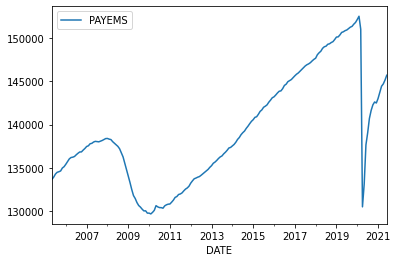

In [ ]:
df.plot() #plot the data then can right click the image-Copy and Paste into your doc

How about job losses? On https://fred.stlouisfed.org/categories search for 'job losses on layoff' yields LNS13023653 and 'Permanent Job Losers' is LNS13026638, so:

In [ ]:
start = datetime.datetime (2005, 5, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['LNS13023653', 'LNS13026638'],
                    'fred', start, end)
df=df.rename(columns={"LNS13023653": "job losses on layoff", "LNS13026638": "perm job losses"})

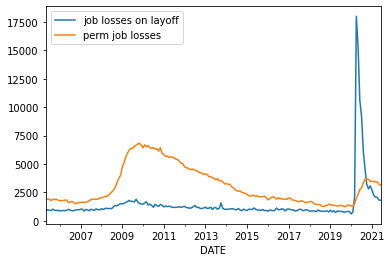

In [ ]:
df.plot()

What about a cross-section, say unemployment rate across NJ counties? Search for 'Unemployment Rate Atlantic County NJ' gets NJATLA2URN, and ''Unemployment Rate Atlantic County NJ' gets
NJCUMB2URN, so:


In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2021, 6, 1)

df = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN'],
                    'fred', start, end)
df=df.rename(columns={"NJATLA2URN": "unemp atl", "NJCUMB2URN": "unemp cum"})

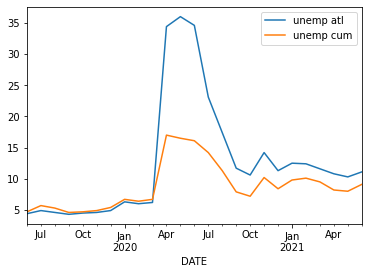

In [ ]:
df.plot()

Wow Atl got hit hard! Must be casinos, hotels, and dining! How about let's compare all of SJ at one point in time! So add few other counties:

NJATLA2URN atl

NJCUMB2URN cumberland

NJSALE5URN salem

NJGLOU5URN gloucester

NJCAMD7URN camden

NJBURL0URN burlington

NJCAPE1URN cape may

NJOCEA5URN ocean

And lets do pre-pandemic and after pandemic

In [ ]:
start = datetime.datetime (2019, 6, 1)
end = datetime.datetime (2019, 6, 1)

dfPre = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPre=dfPre.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

#below is the same just 2020, and called "Post"
start = datetime.datetime (2020, 6, 1)
end = datetime.datetime (2020, 6, 1)

dfPost = pdr.DataReader(['NJATLA2URN', 'NJCUMB2URN','NJSALE5URN','NJGLOU5URN',
                        'NJCAMD7URN','NJBURL0URN','NJCAPE1URN','NJOCEA5URN' ],
                    'fred', start, end)
dfPost=dfPost.rename(columns={"NJATLA2URN":"atl",
                            "NJCUMB2URN":"cum",
                            "NJSALE5URN":"sal",
                            "NJGLOU5URN":"glo",
                            "NJCAMD7URN":"cam",
                            "NJBURL0URN":"bur",
                            "NJCAPE1URN":"cap may",
                            "NJOCEA5URN":"ocean"
                            })

In [ ]:
dfPre

,atl,cum,sal,glo,cam,bur,cap may,ocean
DATE,,,,,,,,
2019-06-01,4.4,4.7,4.4,3.4,3.8,3.0,4.2,3.2


[]

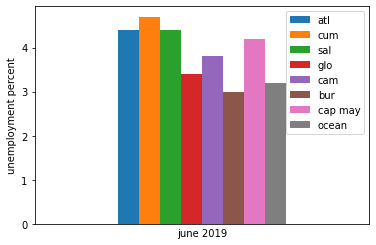

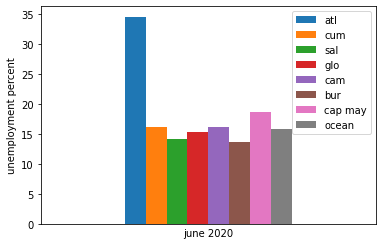

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

Interesting! Looks like there were similar and then atl shot up; but remember about scaling of y axis!, if you make both same scale:


[]

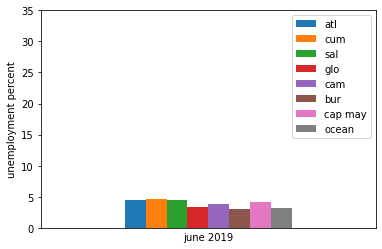

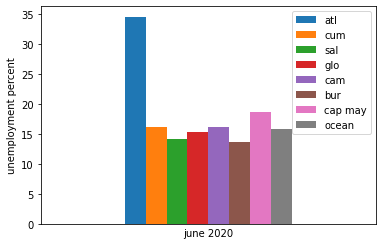

In [ ]:
ax=dfPre.plot(kind="bar")
ax.set(xlabel="june 2019", ylabel="unemployment percent")
ax.set_xticks([])
ax.set_ylim(0,35)

ax=dfPost.plot(kind="bar")
ax.set(xlabel="june 2020", ylabel="unemployment percent")
ax.set_xticks([])

#### World Bank
can actually search from within Py :)

In [ ]:
pdr.wb.search('gdp.*capita.*const')

,id,name,unit,source,sourceNote,sourceOrganization,topics
691,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
10653,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10655,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
10657,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
10658,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [ ]:
dat = pdr.wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2015).stack().unstack(0)

In [ ]:
datNoInd=dat
datNoInd.index=dat.index.droplevel(-1)
datNoInd

country,Canada,Mexico,United States
year,,,
2005,40989.526824,8925.236669,52789.731419
2006,41646.414637,9200.402581,53738.091725
2007,42097.435120,9288.162478,54299.617241
2008,42063.633052,9276.054837,53854.160612
2009,40368.292037,8677.758293,51996.183495
2010,41155.323638,9001.686162,52963.464170
2011,42036.997844,9199.146032,53394.861838
2012,42315.807389,9401.977909,54213.459552
2013,42846.284196,9404.596280,54830.784066


Text(0.5, 1.0, 'my title')

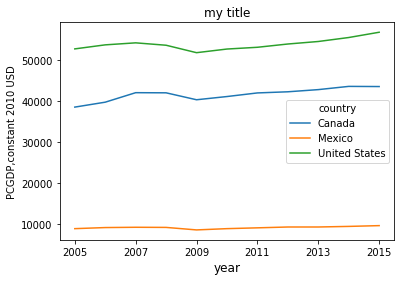

In [ ]:
ax=datNoInd.plot()
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('PCGDP,constant 2010 USD', fontsize=10)
ax.set_title('my title')

Now imagine you want to compare GDP to the Unemployment rate.

In [ ]:
pdr.wb.search('unemp.*').iloc[:,:2]

,id,name
947,9.0.Unemp.All,Unemployed (%)
948,9.0.Unemp.B40,Unemployed-Bottom 40 Percent (%)
949,9.0.Unemp.T60,Unemployed-Top 60 Percent (%)
965,9.1.Unemp.All,"Unemployed (%), Male"
966,9.1.Unemp.B40,"Unemployed-Bottom 40 Percent (%), Male"
...,...,...
17761,per_lm_alllm.cov_q1_tot,Coverage of unemployment benefits and ALMP in ...
17765,per_lm_alllm.cov_q2_tot,Coverage of unemployment benefits and ALMP in ...
17769,per_lm_alllm.cov_q3_tot,Coverage of unemployment benefits and ALMP in ...
17773,per_lm_alllm.cov_q4_tot,Coverage of unemployment benefits and ALMP in ...


In [ ]:
dat = pdr.wb.download(indicator=['NY.GDP.PCAP.KD','SL.UEM.TOTL.NE.ZS'], country=['US', 'CA', 'MX'], start=2015, end=2020)

In [ ]:
#dat
#lets sort it by year within each country
dat=dat.sort_values(['country', 'year'], ascending=[True, True])
dat

NY.GDP.PCAP.KD  SL.UEM.TOTL.NE.ZS
country       year                                   
Canada        2015    43596.135537               6.91
              2016    43536.913403               7.00
              2017    44325.488337               6.34
              2018    44917.483728               5.83
              2019    45109.244486               5.66
              2020    42258.691017               9.46
Mexico        2015     9753.380048               4.31
              2016     9897.150062               3.86
              2017     9997.686914               3.42
              2018    10120.363543               3.27
              2019    10013.703192               3.48
              2020     9147.053505               4.45
United States 2015    56762.729452               5.28
              2016    57292.538783               4.87
              2017    58207.578310               4.36
              2018    59607.393660               3.90
              2019    60698.011299               3.67
              2020    58453.446128               8.05

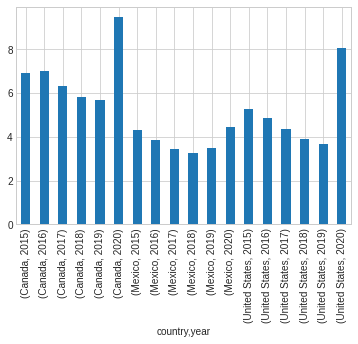

In [ ]:
ax=dat['SL.UEM.TOTL.NE.ZS'].plot(kind="bar")

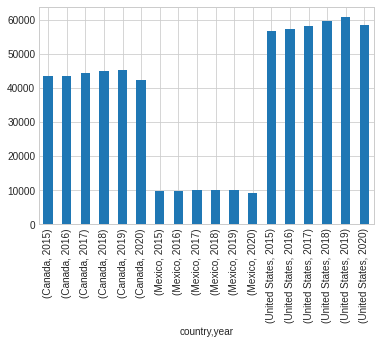

In [ ]:
ax=dat['NY.GDP.PCAP.KD'].plot(kind="bar")